In [1]:
# DON'T CHANGE THIS
# DON'T 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

y = np.random.randint(2, size=(100, 1))          # Generating random labels
y_preds = np.random.uniform(0, 1, size=(100, 1)) # Generating random predictions

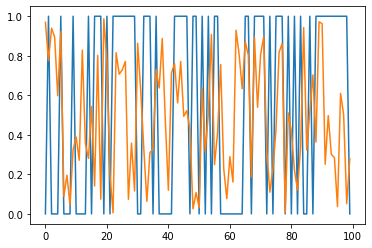

In [2]:
# DON'T CHANGE THIS
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_preds)



In [3]:
def Get_Confusion_Matrix(thersh , y , y_preds):
    y = np.multiply(y, 1)
    y_pre = np.where( y_preds > thersh , 1 , 0)
    TP = ((y == 1) & (y_pre == 1)).sum()
    TN = ((y == 0) & (y_pre == 0)).sum()
    FP = ((y == 0) & (y_pre == 1)).sum()
    FN = ((y == 1) & (y_pre == 0)).sum()  
    Accuracy = round(((TP+TN) / (TP + TN +FP+FN))*100 , 2) 
    conf_Matrix = np.array([[TP , FP] , [FN , TN]])
    precision = round((TP / (TP+FP) )*100 , 2)
    recall = round((TP /( TP+FN))*100 ,2)
    f1_score = round(2*((precision * recall)/(precision + recall)) , 2)
    
    return conf_Matrix,Accuracy,precision,recall,f1_score

In [4]:
thershold = 0.5
result = Get_Confusion_Matrix(thershold , y , y_preds)
print("Accuracy = {} \nprecision = {} \nrecall = {} \nf1_score = {} \n "
      .format(result[1] , result[2] , result[3] , result[4]))
print("Confusion Matrix \n{}".format(result[0]))

Accuracy = 54.0 
precision = 60.42 
recall = 51.79 
f1_score = 55.77 
 
Confusion Matrix 
[[29 19]
 [27 25]]


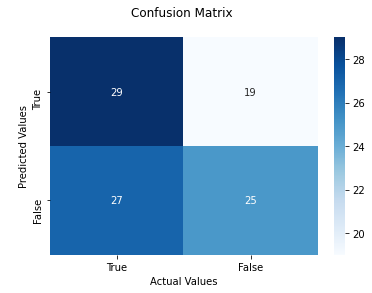

In [5]:
import seaborn as sns
conf_mat = Get_Confusion_Matrix(thershold , y , y_preds)[0]
ax = sns.heatmap(conf_mat , annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('\nPredicted Values');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

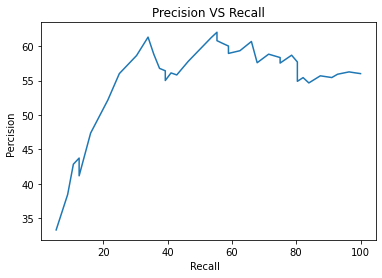

In [6]:
def PLot_Prec_VS_Recall():
    therathold = np.linspace(0,0.9,50)
    precision_list = []
    recal_list = []
    for i in therathold:
        result = Get_Confusion_Matrix( i , y , y_preds)
        precision_list.append(result[2])
        recal_list.append(result[3])
    
    plt.plot(recal_list ,precision_list )
    plt.title('Precision VS Recall')
    plt.xlabel("Recall  ")
    plt.ylabel("Percision  ")
    plt.show()
    
PLot_Prec_VS_Recall()

In [7]:
from scipy.integrate import simps

In [8]:
def get_FPR_TPR(thersh , y , y_preds):
    y = np.multiply(y, 1)
    y_pre = np.where( y_preds > thersh , 1 , 0)
    TP = ((y == 1) & (y_pre == 1)).sum()
    TN = ((y == 0) & (y_pre == 0)).sum()
    FP = ((y == 0) & (y_pre == 1)).sum()
    FN = ((y == 1) & (y_pre == 0)).sum()
    return (TP /(TP +FN )) , (FP /(TN + FP))

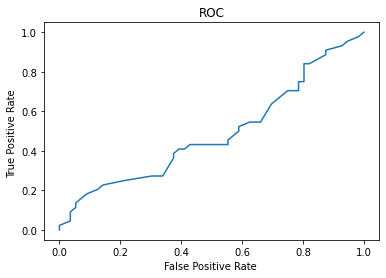

In [9]:
def Plor_ROC(num_of_therh):
    FPR_list = []
    TPR_list = []
    therathold = np.linspace(0,1,num_of_therh)
    for i in therathold:
        result = get_FPR_TPR(i , y , y_preds)
        FPR_list.append(result[0])
        TPR_list.append(result[1])
    plt.plot(FPR_list ,TPR_list)
    plt.title("ROC")
    plt.xlabel("False Positive Rate ")
    plt.ylabel("True Positive Rate ")
    plt.show()
    
    
    
Plor_ROC(50)

In [10]:
def get_AUC(thersh):
    Auc = get_FPR_TPR(thersh, y , y_preds)

    return ((1+Auc[0]-Auc[1])/2)

In [11]:
print(get_AUC(0.5))

0.5430194805194805
